In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import time

In [28]:
data=pd.read_csv('insurance.csv')


# Data cleaning

In [29]:
data.drop_duplicates(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6172\4235751418.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


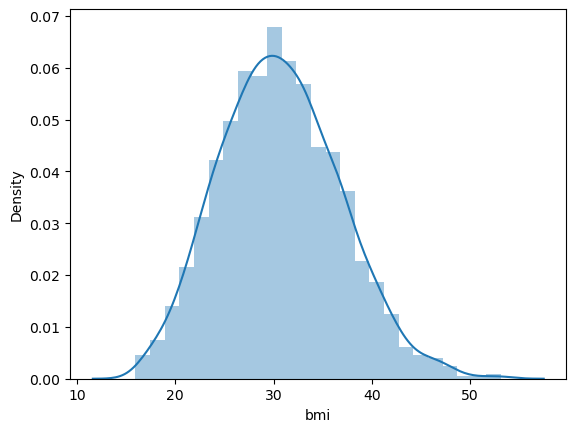

In [30]:
sns.distplot(data['bmi'])

plt.show()

In [31]:
data['bmi'].skew()

0.28391419385321137

In [32]:
# z-score
upper_limit=data['bmi'].mean()+3*data['bmi'].std()
lower_limit=data['bmi'].mean()-3*data['bmi'].std()

# capping
data['bmi']=np.where(
    data['bmi']>upper_limit,
    upper_limit,
    np.where(
        data['bmi']<lower_limit,
        lower_limit,
        data['bmi']
    )
)

# Train_test_Split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('charges',axis=1),data['charges'],test_size=0.2)
x_train

,age,sex,bmi,children,smoker,region
70,27,female,24.750,0,yes,southeast
1042,20,male,30.685,0,yes,northeast
224,42,male,24.640,0,yes,southeast
315,52,male,33.250,0,no,northeast
727,29,female,21.755,1,yes,northeast
...,...,...,...,...,...,...
1129,19,female,18.600,0,no,southwest
615,47,female,36.630,1,yes,southeast
822,18,female,31.130,0,no,southeast
1179,31,male,29.810,0,yes,southeast


# Feature Engineering

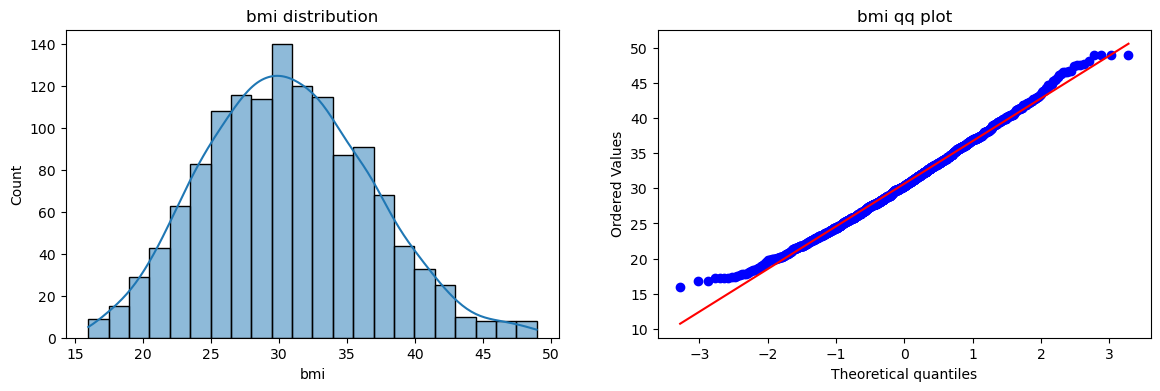

In [34]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(data['bmi'],kde=True)
plt.title('bmi distribution')
plt.subplot(122)
stats.probplot(data['bmi'], dist="norm", plot=plt)
plt.title('bmi qq plot')
plt.show()

# Making my own batch gradient decent class

In [128]:
class gdregressor:
    def __init__(self,learning_rate,epoches):
        self.intercept_=None
        self.coef_=None
        self.lr=learning_rate
        self.epoches=epoches

    def fit(self,x_train,y_train):
        # init your coefs
        self.intercept_=0
        self.coef_=np.ones(x_train.shape[1])


        for i in range(self.epoches):
            # update all the coef and the intercept
            y_hat =np.dot(x_train,self.coef_)+ self.intercept_
            intercept_der=-2 * np.mean(y_train - y_hat)
            self.intercept_= self.intercept_ -(self.lr * intercept_der)

            
            coef_der =-2 * np.dot((y_train - y_hat),x_train)/x_train.shape[0]
            self.coef_= self.coef_ - (self.lr * coef_der)
        print(self.intercept_,self.coef_)


    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

In [129]:
numeric_features = ['age','bmi','children']
categorical_features = ['sex','smoker','region']

In [130]:
preprocess = ColumnTransformer([
    ('log_bmi', FunctionTransformer(np.log1p), ['bmi']),
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

# Pipeline

In [131]:
pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', gdregressor(0.001,5000))
])


In [132]:
start=time.time()
pipe.fit(x_train,y_train)
print("time taken is:",time.time()-start)

639.9165281351727 [ 2.52203334e+03  3.48564534e+03  1.68463841e+03  6.00697228e+02
  5.06393406e+02  1.90616621e+04 -2.34382058e+02  9.12706811e+00
 -7.68742814e+02]
time taken is: 1.3614528179168701


In [133]:
y_predict=pipe.predict(x_test)

In [134]:
y_predict

array([30716.2678281 ,  5140.59438786,   918.93936764, 10705.73005716,
       10573.01539511,  7236.53567862, 34721.99382108,  4750.20742466,
       10799.4337096 , 11106.34650769, 13371.25941785, 27469.19024   ,
       30285.33238014, 34738.1239549 , 33517.84891578,  2505.60643815,
        4347.91467634,  5338.04374538,  8688.43225146, 30125.3762002 ,
       10745.02753585, 11787.11642459,  8054.55103422,  6372.01554749,
        2335.86410342,  5907.55737807,  6163.86506759,  7983.23610225,
        7239.45353109,  5508.62766965,  4697.71476372, 34483.39896372,
        5266.1501234 ,  6047.04371773, 25735.33507529,  5198.5990774 ,
        8863.57945743,  4991.96310057, 14496.88768272,  9281.76076514,
       35403.52403145,  3905.15953723, 11940.72839594, 11556.5905043 ,
       11984.46665852, 16001.09058271, 27933.22547543,  9717.70899813,
       23599.45025677, 11373.39667085, 16138.61620676, 11750.98631837,
       27530.51128864,  6764.89776994, 34525.62584946,  1851.26947374,
      

In [135]:
y_test

1007    24915.22085
414      2134.90150
821      2680.94930
724     10106.13425
537      8825.08600
           ...     
748      8556.90700
189      4922.91590
619     10713.64400
274      2523.16950
690      2104.11340
Name: charges, Length: 268, dtype: float64

In [136]:
print("R² Score:", r2_score(y_test,y_predict))

R² Score: 0.7130990056966873
